<a href="https://colab.research.google.com/github/hrbae/LG_AI_training/blob/main/M2_System%20Optimization%20by%20ML/LG_day2_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Colab\ Notebooks/DL_from_scratch_my

/content/drive/MyDrive/Colab Notebooks/DL_from_scratch_my


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict
from common.optimizer import *

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


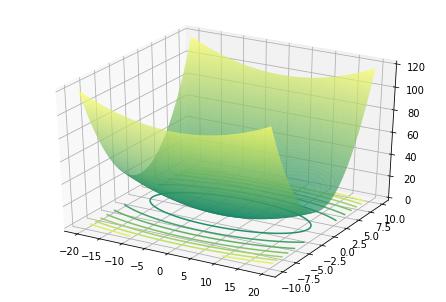

In [ ]:
def f(x, y):
    return x**2 / 20.0 + y**2


#def df(x, y):
#    return x / 10.0, 2.0*y

fig = plt.figure()
ax=Axes3D(fig)
X = np.arange(-20, 20, 0.1)
Y = np.arange(-10, 10, 0.1)
X,Y=np.meshgrid(X, Y)

Z = f(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='summer')
ax.contour(X, Y, Z, zdir='z', offset=0, cmap=plt.cm.summer)
plt.show()

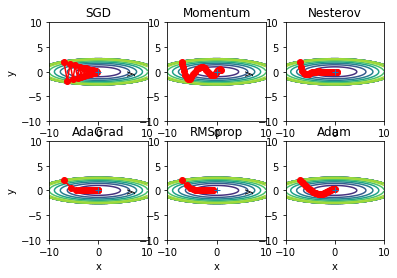

In [ ]:
init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["Nesterov"] = Nesterov(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["RMSprop"] = RMSprop(lr=0.1)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 3, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()
